# create figures for med4 DE long term 

In [88]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

In [89]:
library(ggrepel)

In [90]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [91]:
fname_hcounts = file.path('..', 'RNASEQ', 'data', 'MED4_counts_combined.txt')
hcdf = read.csv(fname_hcounts, sep='\t' )
hgenes = hcdf[,c(1,2,3,4,5)]
hpath_fname = file.path('..', 'genomes', 'MED4', 'MED4_pathways.csv')
hpath_df = read.csv(hpath_fname)
#hpath_df = left_join(hgenes, hpath_df, by='protein_id', multiple='all')

In [92]:
hpath_df = hpath_df  %>% 
    extract(path, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?", remove = FALSE) %>%
    mutate(pathway = str_replace(pathway, "in photosynthetic organisms", "")) %>%
    mutate(pathway = str_trim(pathway))

In [93]:
hpath_df %>% count(main) #%>% #arrange(desc(n)) %>% filter(n>40)
dput(unique(hpath_df$main))

main,n
<chr>,<int>
,852
09100 Metabolism,815
09120 Genetic Information Processing,181
09130 Environmental Information Processing,78
09140 Cellular Processes,52
09150 Organismal Systems,38
09160 Human Diseases,84
09180 Brite Hierarchies,703
09190 Not Included in Pathway or Brite,113


c("09120 Genetic Information Processing", "09180 Brite Hierarchies", 
"", "09100 Metabolism", "09130 Environmental Information Processing", 
"09140 Cellular Processes", "09190 Not Included in Pathway or Brite", 
"09160 Human Diseases", "09150 Organismal Systems", NA)


In [147]:
df_all_orig = read_csv(file.path('DE_results', 'MED4_all_FC_results.csv'))



Rows: 24377 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): contrast, gene_id, Assay, contrast1
dbl (5): logFC, AveExpr, pvalue, padj, Length
lgl (2): down, up

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [148]:
df_all_orig = df_all_orig %>%
    filter(contrast1 %in% c('LATEvsC1_prot', 'LATEvsC1P1_rna'))

In [151]:
str(df_all)

spc_tbl_ [3,279 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ contrast : chr [1:3279] "Clongterm - C1" "Clongterm - C1" "Clongterm - C1" "Clongterm - C1" ...
 $ gene_id  : chr [1:3279] "TX50_RS01980" "TX50_RS00040" "TX50_RS04695" "TX50_RS01970" ...
 $ logFC    : num [1:3279] 3.19 -1.44 1.37 3.71 2.21 ...
 $ AveExpr  : num [1:3279] 0.917 1.585 2.225 3.666 -1.347 ...
 $ pvalue   : num [1:3279] 6.25e-10 1.20e-08 1.73e-08 2.51e-08 2.65e-08 ...
 $ padj     : num [1:3279] 8.90e-07 7.13e-06 7.13e-06 7.13e-06 7.13e-06 ...
 $ Assay    : chr [1:3279] "Proteome" "Proteome" "Proteome" "Proteome" ...
 $ contrast1: chr [1:3279] "LATEvsC1_prot" "LATEvsC1_prot" "LATEvsC1_prot" "LATEvsC1_prot" ...
 $ Length   : num [1:3279] 852 2439 912 1491 1134 ...
 $ down     : logi [1:3279] FALSE TRUE FALSE FALSE FALSE FALSE ...
 $ up       : logi [1:3279] TRUE FALSE TRUE TRUE TRUE TRUE ...
 - attr(*, "spec")=
  .. cols(
  ..   contrast = col_character(),
  ..   gene_id = col_character(),
  ..   logFC = col_doub

In [152]:
df_all$gene_id

[1] "TX50_RS01980" "TX50_RS00040" "TX50_RS04695" "TX50_RS01970"
   [5] "TX50_RS05170" "TX50_RS05585" "TX50_RS01975" "TX50_RS07865"
   [9] "TX50_RS05640" "TX50_RS05130" "TX50_RS01170" "TX50_RS06550"
  [13] "TX50_RS06615" "TX50_RS03290" "TX50_RS05160" "TX50_RS04285"
  [17] "TX50_RS05580" "TX50_RS04945" "TX50_RS09370" "TX50_RS04160"
  [21] "TX50_RS06155" "TX50_RS05425" "TX50_RS02855" "TX50_RS09190"
  [25] "TX50_RS08375" "TX50_RS08715" "TX50_RS05100" "TX50_RS05300"
  [29] "TX50_RS07090" "TX50_RS05620" "TX50_RS01260" "TX50_RS06635"
  [33] "TX50_RS09205" "TX50_RS01330" "TX50_RS01495" "TX50_RS01795"
  [37] "TX50_RS09070" "TX50_RS01985" "TX50_RS03105" "TX50_RS09080"
  [41] "TX50_RS04250" "TX50_RS05135" "TX50_RS07480" "TX50_RS00880"
  [45] "TX50_RS04910" "TX50_RS06370" "TX50_RS05125" "TX50_RS06630"
  [49] "TX50_RS02980" "TX50_RS06645" "TX50_RS07645" "TX50_RS01365"
  [53] "TX50_RS00240" "TX50_RS05775" "TX50_RS05165" "TX50_RS05700"
  [57] "TX50_RS02025" "TX50_RS03400" "TX50_RS01150" "TX50_RS08200"
  [61] "TX50_RS09195" "TX50_RS04105" "TX50_RS06265" "TX50_RS01940"
  [65] "TX50_RS07180" "TX50_RS02580" "TX50_RS05590" "TX50_RS07575"
  [69] "TX50_RS07610" "TX50_RS03080" "TX50_RS06240" "TX50_RS09705"
  [73] "TX50_RS06725" "TX50_RS01635" "TX50_RS06655" "TX50_RS00900"
  [77] "TX50_RS01685" "TX50_RS07760" "TX50_RS08005" "TX50_RS03415"
  [81] "TX50_RS06540" "TX50_RS08785" "TX50_RS06245" "TX50_RS02935"
  [85] "TX50_RS05720" "TX50_RS01105" "TX50_RS03860" "TX50_RS00655"
  [89] "TX50_RS05270" "TX50_RS05035" "TX50_RS05175" "TX50_RS02195"
  [93] "TX50_RS02035" "TX50_RS00515" "TX50_RS01955" "TX50_RS08170"
  [97] "TX50_RS06060" "TX50_RS05155" "TX50_RS02005" "TX50_RS08260"
 [101] "TX50_RS03360" "TX50_RS01355" "TX50_RS08845" "TX50_RS04905"
 [105] "TX50_RS08815" "TX50_RS07345" "TX50_RS03935" "TX50_RS09155"
 [109] "TX50_RS00430" "TX50_RS02960" "TX50_RS05180" "TX50_RS04575"
 [113] "TX50_RS07615" "TX50_RS04140" "TX50_RS03330" "TX50_RS04755"
 [117] "TX50_RS06855" "TX50_RS01155" "TX50_RS02135" "TX50_RS07765"
 [121] "TX50_RS08915" "TX50_RS02165" "TX50_RS00120" "TX50_RS08860"
 [125] "TX50_RS06650" "TX50_RS01275" "TX50_RS06970" "TX50_RS08615"
 [129] "TX50_RS00755" "TX50_RS05965" "TX50_RS02845" "TX50_RS08015"
 [133] "TX50_RS03370" "TX50_RS02600" "TX50_RS08470" "TX50_RS08165"
 [137] "TX50_RS07885" "TX50_RS06620" "TX50_RS01665" "TX50_RS02820"
 [141] "TX50_RS02460" "TX50_RS03140" "TX50_RS02440" "TX50_RS04475"
 [145] "TX50_RS04065" "TX50_RS03150" "TX50_RS02945" "TX50_RS01180"
 [149] "TX50_RS00285" "TX50_RS06140" "TX50_RS07725" "TX50_RS02045"
 [153] "TX50_RS00300" "TX50_RS00095" "TX50_RS02150" "TX50_RS07675"
 [157] "TX50_RS04930" "TX50_RS01060" "TX50_RS06095" "TX50_RS06810"
 [161] "TX50_RS05215" "TX50_RS07740" "TX50_RS00865" "TX50_RS06755"
 [165] "TX50_RS01315" "TX50_RS01265" "TX50_RS02010" "TX50_RS01300"
 [169] "TX50_RS07145" "TX50_RS03030" "TX50_RS03240" "TX50_RS07970"
 [173] "TX50_RS08610" "TX50_RS08590" "TX50_RS02360" "TX50_RS06565"
 [177] "TX50_RS08100" "TX50_RS01835" "TX50_RS08660" "TX50_RS07300"
 [181] "TX50_RS06875" "TX50_RS08120" "TX50_RS08450" "TX50_RS08210"
 [185] "TX50_RS08400" "TX50_RS04635" "TX50_RS05975" "TX50_RS07220"
 [189] "TX50_RS03120" "TX50_RS06225" "TX50_RS01550" "TX50_RS02505"
 [193] "TX50_RS06680" "TX50_RS03990" "TX50_RS08145" "TX50_RS02925"
 [197] "TX50_RS04940" "TX50_RS00520" "TX50_RS02965" "TX50_RS08255"
 [201] "TX50_RS06475" "TX50_RS04505" "TX50_RS05020" "TX50_RS07205"
 [205] "TX50_RS02290" "TX50_RS04885" "TX50_RS04515" "TX50_RS06675"
 [209] "TX50_RS05275" "TX50_RS07535" "TX50_RS05905" "TX50_RS00665"
 [213] "TX50_RS05505" "TX50_RS06405" "TX50_RS01935" "TX50_RS00055"
 [217] "TX50_RS02940" "TX50_RS02715" "TX50_RS01325" "TX50_RS03215"
 [221] "TX50_RS00290" "TX50_RS06890" "TX50_RS02160" "TX50_RS08235"
 [225] "TX50_RS04235" "TX50_RS07530" "TX50_RS05015" "TX50_RS04970"
 [229] "TX50_RS09260" "TX50_RS03575" "TX50_RS09360" "TX50_RS04010"
 [233] "TX50_RS00020" "TX50_RS08960" "TX50_RS01820" "TX50_RS06760"
 [237] "TX50_RS06165" "TX50_RS08465" "TX50_RS06610

In [96]:
df_degenes = df_all_orig %>% 
    filter(padj < 0.05)

In [97]:
df_degenes2 = df_all_orig %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>1.5)

# add category information

In [98]:
kegg_main_list = c(
        '09100 Metabolism', 
        '09120 Genetic Information Processing', 
        '09130 Environmental Information Processing' , 
        '09180 Brite Hierarchies', 
        '09190 Not Included in Pathway or Brite')


In [99]:
kegg_mapping_df = read_csv('pro_kegg_map.csv')
kegg_mapping_df

Rows: 23 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): main, sub, Category
dbl (1): n

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


main,sub,n,Category
<chr>,<chr>,<dbl>,<chr>
09180 Brite Hierarchies,09182 Protein families: genetic information processing,128,Genetic Info
09100 Metabolism,09102 Energy metabolism,84,Energy/Carbohydrate/Glycan
09180 Brite Hierarchies,09181 Protein families: metabolism,79,Metabolism
09100 Metabolism,09101 Carbohydrate metabolism,74,Energy/Carbohydrate/Glycan
09180 Brite Hierarchies,09183 Protein families: signaling and cellular processes,60,Transport/Signal/cell processes
09100 Metabolism,09105 Amino acid metabolism,52,Amino acid/Nucleotide
09100 Metabolism,09108 Metabolism of cofactors and vitamins,48,Metabolism
09120 Genetic Information Processing,09124 Replication and repair,26,Genetic Info
09190 Not Included in Pathway or Brite,09191 Unclassified: metabolism,24,Metabolism


In [100]:
kegg_mapping2_df = read_csv('pro_kegg_path_map.csv')
kegg_mapping2_df

Rows: 8 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): path, New_Category

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


path,New_Category
<chr>,<chr>
00195 Photosynthesis [PATH:ko00195],Photosynthesis/Carbon fixation
00710 Carbon fixation in photosynthetic organisms [PATH:ko00710],Photosynthesis/Carbon fixation
00910 Nitrogen metabolism [PATH:ko00910],Nitrogen metabolism
00194 Photosynthesis proteins [BR:ko00194],Photosynthesis/Carbon fixation
02000 Transporters [BR:ko02000],Transport/Signal/cell processes
99985 Amino acid metabolism,Amino acid/Nucleotide
01007 Amino acid related enzymes [BR:ko01007],Amino acid/Nucleotide
99982 Energy metabolism,Energy/Carbohydrate/Glycan


In [101]:
hpath_df = hpath_df %>% 

    extract(sub, c("module"), "^[[:digit:]]* *([^\\[]+) *\\[?", remove = FALSE) %>%
    mutate(module = str_replace(module, "in photosynthetic organisms", "")) %>%
    mutate(module = str_replace(module, "metabolism", "")) %>%
    mutate(module = str_replace(module, "Biosynthesis of", "")) %>%
    mutate(module = str_replace(module, "Metabolism of", "")) %>%
    mutate(module = str_replace(module, "biosynthesis", "")) %>%
    mutate(module = str_trim(module)) 



In [102]:
# add Category
hpath_df = left_join(hpath_df, kegg_mapping_df, by=c('sub', 'main'), )


In [103]:
hpath_df = left_join(hpath_df, kegg_mapping2_df, by='path' )


In [104]:
hpath_df = hpath_df %>%
    mutate(Category = if_else(is.na(New_Category), Category, New_Category) )

In [105]:
# uncomment to recreate the file
hpath_df %>% 
    filter(gene_id %in% df_degenes2$gene_id) %>%
 filter(main %in% kegg_main_list) %>%
count(main, sub, path, Category, ) %>% write_csv('pro_kegg_map2.csv')
#arrange(desc(n)) #%>% filter(n>40)


In [106]:
# uncomment to recreate the file
hpath_df %>% 
    filter(gene_id %in% df_degenes2$gene_id) %>%
#filter(main %in% kegg_main_list) %>%
count(Category) %>% #write_csv('pro_kegg_map.csv')
arrange(desc(n)) #%>% filter(n>40)


Category,n
<chr>,<int>
NA,163
Genetic Info,40
Metabolism,34
Transport/Signal/cell processes,31
Photosynthesis/Carbon fixation,27
Energy/Carbohydrate/Glycan,26
Amino acid/Nucleotide,20
Nitrogen metabolism,6
Poorly characterized,6


In [107]:
# uncomment to recreate the file
hpath_df %>% 
    filter(gene_id %in% df_degenes$gene_id) %>%
#filter(main %in% kegg_main_list) %>%
count(Category) %>% #write_csv('pro_kegg_map.csv')
arrange(desc(n)) #%>% filter(n>40)


Category,n
<chr>,<int>
NA,386
Genetic Info,196
Metabolism,166
Energy/Carbohydrate/Glycan,131
Transport/Signal/cell processes,99
Amino acid/Nucleotide,89
Photosynthesis/Carbon fixation,67
Poorly characterized,15
Nitrogen metabolism,6


In [108]:
dput(unique(hpath_df$Category))

c("Genetic Info", NA, "Amino acid/Nucleotide", "Metabolism", 
"Transport/Signal/cell processes", "Energy/Carbohydrate/Glycan", 
"Photosynthesis/Carbon fixation", "Poorly characterized", "Nitrogen metabolism"
)


In [109]:
# uncomment to recreate the file
hpath_df %>% 
    filter(gene_id %in% df_degenes2$gene_id) %>%
filter(Category == 'Energy/Carbohydrate/Glycan') %>%
count(path) %>% #write_csv('pro_kegg_map.csv')
arrange(desc(n)) #%>% filter(n>40)


path,n
<chr>,<int>
00630 Glyoxylate and dicarboxylate metabolism [PATH:ko00630],4
00920 Sulfur metabolism [PATH:ko00920],4
00010 Glycolysis / Gluconeogenesis [PATH:ko00010],2
00030 Pentose phosphate pathway [PATH:ko00030],2
00190 Oxidative phosphorylation [PATH:ko00190],2
00541 O-Antigen nucleotide sugar biosynthesis [PATH:ko00541],2
00040 Pentose and glucuronate interconversions [PATH:ko00040],1
00051 Fructose and mannose metabolism [PATH:ko00051],1
00520 Amino sugar and nucleotide sugar metabolism [PATH:ko00520],1


In [110]:
# uncomment to recreate the file
hpath_df %>% 
    filter(gene_id %in% df_degenes$gene_id) %>%
filter(Category == 'metabolism') %>%
count(path) %>% #write_csv('pro_kegg_map.csv')
arrange(desc(n)) #%>% filter(n>40)


path,n
<chr>,<int>


In [111]:
head(hpath_df)

,gene_id,gene,product,protein_id,old_locus_tag,X,path_id,main,sub,module,path,pathway,ecpath,n,Category,New_Category
,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,14,K02338,09120 Genetic Information Processing,09124 Replication and repair,Replication and repair,03030 DNA replication [PATH:ko03030],DNA replication,K02338 dnaN; DNA polymerase III subunit beta [EC:2.7.7.7],26,Genetic Info,NA
2,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,15,K02338,09120 Genetic Information Processing,09124 Replication and repair,Replication and repair,03430 Mismatch repair [PATH:ko03430],Mismatch repair,K02338 dnaN; DNA polymerase III subunit beta [EC:2.7.7.7],26,Genetic Info,NA
3,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,16,K02338,09120 Genetic Information Processing,09124 Replication and repair,Replication and repair,03440 Homologous recombination [PATH:ko03440],Homologous recombination,K02338 dnaN; DNA polymerase III subunit beta [EC:2.7.7.7],26,Genetic Info,NA
4,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,17,K02338,09180 Brite Hierarchies,09182 Protein families: genetic information processing,Protein families: genetic information processing,03032 DNA replication proteins [BR:ko03032],DNA replication proteins,K02338 dnaN; DNA polymerase III subunit beta [EC:2.7.7.7],128,Genetic Info,NA
5,TX50_RS00020,dnaN,DNA polymerase III subunit beta,WP_011131639.1,NA,18,K02338,09180 Brite Hierarchies,09182 Protein families: genetic information processing,Protein families: genetic information processing,03400 DNA repair and recombination proteins [BR:ko03400],DNA repair and recombination proteins,K02338 dnaN; DNA polymerase III subunit beta [EC:2.7.7.7],128,Genetic Info,NA
6,TX50_RS00025,,hypothetical protein,WP_011131640.1,NA,19,,,,NA,,NA,,NA,NA,NA


In [112]:
hpath_df = hpath_df %>% 
    extract(ecpath, c("kegg_gene"), "^K[[:digit:]]+ *([^;]*);", remove = FALSE) 

In [113]:
# clean it up
hpath_df = hpath_df %>% 
    mutate(kegg_gene2 = kegg_gene %>%
           str_split(",\\s*") %>%                    # Split by comma + optional space
           map(~ .x[!is.na(.x) & str_detect(.x, "^[a-z]{3}[A-Z]?$")]) %>%
           map(~ .x[!is.na(.x) & !str_detect(.x, "^E\\d+")]) %>%
           map(~ .x[!is.na(.x) & !str_detect(.x, "^K0\\d+")]) %>%
           map_chr(~ str_c(.x, collapse = ","))     # Concatenate back
    )

In [114]:
# take the first one
hpath_df <- hpath_df %>%
  mutate(kegg_gene2 = kegg_gene %>%
           str_split(",\\s*") %>%
           map_chr(~ {
             match <- .x[str_detect(.x, "^[a-z]{3}[A-Z]?$")]
             if (length(match) > 0) match[1] else NA_character_
           })
         )


In [115]:
hpath_df = hpath_df %>% 
    mutate(
        prev_gene = gene,
        gene = if_else((prev_gene != '') | (is.na(kegg_gene2)), prev_gene, paste0('(',kegg_gene2,')'))
        
    )

In [116]:
hpath_df_to_export = hpath_df %>% 
     group_by(gene_id) %>% 
     mutate(
         main = paste0(unique(main), collapse = ";"),
         sub = paste0(unique(sub), collapse = ";"),
         path = paste0(unique(path), collapse = ";"),
         ecpath = paste0(unique(ecpath), collapse = ";"),
         pathway = paste0(unique(pathway), collapse = ";"),
         module = paste0(unique(module), collapse = ";"),
         Category = paste0(unique(Category), collapse = ";")
         
     ) %>%
    ungroup() %>%
    distinct(gene_id, .keep_all = TRUE)

In [117]:


hpath_df_to_export_filter = hpath_df %>% 
    filter(main %in% kegg_main_list) %>%
     group_by(gene_id) %>% 
     mutate(
         main = paste0(unique(main), collapse = ";"),
         sub = paste0(unique(sub), collapse = ";"),
         path = paste0(unique(path), collapse = ";"),
         ecpath = paste0(unique(ecpath), collapse = ";"),
         pathway = paste0(unique(pathway), collapse = ";"),
         module = paste0(unique(module), collapse = ";"),
         Category = paste0(sort(unique(Category)), collapse = ";"),
         membrane_transport = str_detect(Category, 'Transport/Signal/cell processes'), 
         #           grepl('', sub)~'Secondary',

     Category = str_replace(Category, ';Metabolism', ''),
     Category = str_replace(Category, ';Transport/Signal/cell processes', ''),
         # overrrides
     Category = if_else(str_detect(Category, 'Nitrogen metabolism'), 'Nitrogen metabolism', Category),
     Category = if_else(str_detect(Category, 'Photosynthesis/Carbon fixation'), 'Photosynthesis/Carbon fixation', Category),
     Category = if_else(str_detect(Category, 'Amino acid/Nucleotide'), 'Amino acid/Nucleotide', Category),
     Category = if_else(str_detect(Category, 'Energy/Carbohydrate/Glycan'), 'Energy/Carbohydrate/Glycan', Category)
          
     ) %>%
    ungroup() %>%
    distinct(gene_id, .keep_all = TRUE)

In [118]:
hpath_df_to_export %>% filter(!gene_id %in% hpath_df_to_export_filter$gene_id) %>%
filter(main != '')


gene_id,gene,product,protein_id,old_locus_tag,X,path_id,main,sub,module,path,pathway,ecpath,kegg_gene,n,Category,New_Category,kegg_gene2,prev_gene
<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
TX50_RS02235,,methyltransferase domain-containing protein,WP_011132052.1,NA,618,K07755,09160 Human Diseases,09161 Cancer: overview,Cancer: overview,05208 Chemical carcinogenesis - reactive oxygen species [PATH:ko05208],Chemical carcinogenesis - reactive oxygen species,K07755 AS3MT; arsenite methyltransferase [EC:2.1.1.137],AS3MT,NA,NA,NA,NA,
TX50_RS02260,lepA,translation elongation factor 4,WP_011132056.1,NA,622,K03596,09160 Human Diseases,09171 Infectious disease: bacterial,Infectious disease: bacterial,05134 Legionellosis [PATH:ko05134],Legionellosis,K03596 lepA; GTP-binding protein LepA,lepA,NA,NA,NA,lepA,lepA
TX50_RS03060,,AbrB family transcriptional regulator,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
TX50_RS03640,,ATP-dependent Clp protease adaptor ClpS,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
TX50_RS04365,,high light inducible protein,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
TX50_RS07310,,hypothetical protein,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
TX50_RS07510,,high light inducible protein,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
__no_feature,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
__ambiguous,,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,


In [119]:
hpath_df_to_export_filter %>% filter(str_detect(product, 'hypothetical' )) %>% count(product,main,Category)


product,main,Category,n
<chr>,<chr>,<chr>,<int>
hypothetical protein,09100 Metabolism,Energy/Carbohydrate/Glycan,1
hypothetical protein,09100 Metabolism;09180 Brite Hierarchies,Amino acid/Nucleotide,1
hypothetical protein,09100 Metabolism;09180 Brite Hierarchies,Metabolism,2
hypothetical protein,09130 Environmental Information Processing;09180 Brite Hierarchies,Transport/Signal/cell processes,1
hypothetical protein,09180 Brite Hierarchies,Genetic Info,3
hypothetical protein,09180 Brite Hierarchies,Photosynthesis/Carbon fixation,1


In [120]:
hpath_df_to_export %>% filter(str_detect(product, 'hypothetical' )) %>% count(product,main,Category)

product,main,Category,n
<chr>,<chr>,<chr>,<int>
hypothetical protein,,NA,383
hypothetical protein,09100 Metabolism,Energy/Carbohydrate/Glycan,1
hypothetical protein,09100 Metabolism;09180 Brite Hierarchies,Amino acid/Nucleotide;Transport/Signal/cell processes,1
hypothetical protein,09100 Metabolism;09180 Brite Hierarchies,Metabolism,2
hypothetical protein,09130 Environmental Information Processing;09180 Brite Hierarchies,Transport/Signal/cell processes,1
hypothetical protein,09180 Brite Hierarchies,Genetic Info,3
hypothetical protein,09180 Brite Hierarchies,Photosynthesis/Carbon fixation,1
hypothetical protein,NA,NA,1


In [121]:
# uncomment to recreate the file
hpath_df_to_export_filter %>% 
    #filter(gene_id %in% df_degenes$gene_id) %>%
#filter(main %in% kegg_main_list) %>%
count(Category) %>% #write_csv('pro_kegg_map.csv')
arrange(desc(n)) #%>% filter(n>40)


Category,n
<chr>,<int>
Genetic Info,301
Metabolism,202
Amino acid/Nucleotide,198
Energy/Carbohydrate/Glycan,106
Transport/Signal/cell processes,95
Photosynthesis/Carbon fixation,62
Poorly characterized,36
Nitrogen metabolism,6


In [122]:
# uncomment to recreate the file
hpath_df_to_export_filter %>% 
    filter(gene_id %in% df_degenes2$gene_id) %>%
filter(Category == 'Metabolism') %>%
count(path) %>% #write_csv('pro_kegg_map.csv')
arrange(desc(n)) #%>% filter(n>40)


path,n
<chr>,<int>
00860 Porphyrin metabolism [PATH:ko00860],5
99980 Enzymes with EC numbers,4
01002 Peptidases and inhibitors [BR:ko01002],2
00061 Fatty acid biosynthesis [PATH:ko00061];00780 Biotin metabolism [PATH:ko00780];00333 Prodigiosin biosynthesis [PATH:ko00333];01004 Lipid biosynthesis proteins [BR:ko01004],1
00740 Riboflavin metabolism [PATH:ko00740],1
00760 Nicotinate and nicotinamide metabolism [PATH:ko00760],1
00785 Lipoic acid metabolism [PATH:ko00785],1
00900 Terpenoid backbone biosynthesis [PATH:ko00900],1
00900 Terpenoid backbone biosynthesis [PATH:ko00900];01006 Prenyltransferases [BR:ko01006],1


In [123]:
df_all = left_join(df_all_orig, hpath_df_to_export_filter, by='gene_id')

In [124]:
df_all = df_all %>% 
    mutate(
        Category = if_else(is.na(Category), 'Uncharacterized', Category),
        Category = if_else(Category == 'Poorly characterized', 'Uncharacterized', Category)
          )

In [125]:
df_all %>% count(Category) %>% arrange(desc(n)) 

Category,n
<chr>,<int>
Uncharacterized,1420
Genetic Info,569
Amino acid/Nucleotide,394
Metabolism,390
Energy/Carbohydrate/Glycan,205
Transport/Signal/cell processes,175
Photosynthesis/Carbon fixation,114
Nitrogen metabolism,12


In [126]:
unique(df_all$contrast1)

[1] "LATEvsC1_prot"  "LATEvsC1P1_rna"

In [127]:
t(head(df_all))

contrast,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1
gene_id,TX50_RS01980,TX50_RS00040,TX50_RS04695,TX50_RS01970,TX50_RS05170,TX50_RS05585
logFC,3.191075,-1.443788,1.373159,3.706744,2.210139,2.786227
AveExpr,0.9167156,1.5845359,2.2254880,3.6657560,-1.3469405,-1.7260158
pvalue,6.252913e-10,1.202458e-08,1.731707e-08,2.510390e-08,2.650587e-08,3.478220e-08
padj,8.904149e-07,7.127836e-06,7.127836e-06,7.127836e-06,7.127836e-06,7.127836e-06
Assay,Proteome,Proteome,Proteome,Proteome,Proteome,Proteome
contrast1,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot
Length,852,2439,912,1491,1134,954
down,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
up,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE


In [128]:
# number of differentiall expressed genes
df_all %>%
    filter(padj < 0.05) %>% count(Assay, down)

Assay,down,n
<chr>,<lgl>,<int>
Proteome,FALSE,208
Proteome,TRUE,206
RNA,FALSE,207
RNA,TRUE,178


# Top up and down regulated genes

In [129]:
df_all %>%
    filter(padj < 0.05) %>% top_n(-50, logFC) %>% 
    select(Assay,logFC,gene, product, Category) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category
<chr>,<dbl>,<chr>,<chr>,<chr>
Proteome,-3.062849,(pepE),peptidase E,Metabolism
Proteome,-3.089786,NA,NA,Uncharacterized
Proteome,-2.437843,NA,NA,Uncharacterized
Proteome,-1.956601,NA,NA,Uncharacterized
Proteome,-1.959779,raiA,ribosome-associated translation inhibitor RaiA,Genetic Info
Proteome,-2.659823,(wecA),undecaprenyl/decaprenyl-phosphate alpha-N-acetylglucosaminyl 1-phosphate transferase,Energy/Carbohydrate/Glycan
Proteome,-2.122447,NA,NA,Uncharacterized
Proteome,-2.428226,(rfbD),sugar nucleotide-binding protein,Energy/Carbohydrate/Glycan
RNA,-1.790114,gap,type I glyceraldehyde-3-phosphate dehydrogenase,Photosynthesis/Carbon fixation


In [130]:
get_top_gene_id <- function(df_all, assay, top_number) {
    df_all %>%
        filter(padj < 0.05) %>% 
        filter(Assay == assay) %>% 
        top_n(top_number, logFC) %>% 
        select(gene_id, Assay)
}
number_of_top_ids = 5
top_up_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', number_of_top_ids), get_top_gene_id(df_all, 'RNA', number_of_top_ids)))
top_down_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', -number_of_top_ids), get_top_gene_id(df_all, 'RNA', -number_of_top_ids)))


In [131]:
dput(names(df_all))

c("contrast", "gene_id", "logFC", "AveExpr", "pvalue", "padj", 
"Assay", "contrast1", "Length", "down", "up", "gene", "product", 
"protein_id", "old_locus_tag", "X", "path_id", "main", "sub", 
"module", "path", "pathway", "ecpath", "kegg_gene", "n", "Category", 
"New_Category", "kegg_gene2", "prev_gene", "membrane_transport"
)


In [132]:
df_pivot_for_top = df_all %>%
    pivot_wider(
        names_from = 'Assay',
        values_from = c("logFC", #"AveExpr", "pvalue",
                        "padj", ),
        id_cols=c("gene_id",  "gene",  "product",  "sub", 
                  #"module",
                  "path"
                  #"pathway",
                 # "ecpath"
                 )
    ) %>% select(gene_id, gene, product, sub, path, logFC_Proteome, padj_Proteome,logFC_RNA,padj_RNA)


In [133]:
dput(names(df_pivot_for_top))

c("gene_id", "gene", "product", "sub", "path", "logFC_Proteome", 
"padj_Proteome", "logFC_RNA", "padj_RNA")


In [134]:
df_pivot_for_top %>% filter(gene_id %in% top_up_de_genes$gene_id) %>% arrange(desc(logFC_RNA), desc(logFC_Proteome) )

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS07555,NA,NA,NA,NA,NA,NA,7.163547,7.016344e-24
TX50_RS09500,NA,NA,NA,NA,NA,NA,5.287747,5.587907e-45
TX50_RS09840,NA,NA,NA,NA,NA,NA,4.940470,6.618466e-54
TX50_RS09690,NA,NA,NA,NA,NA,NA,4.811467,3.088460e-24
TX50_RS04605,NA,NA,NA,NA,NA,NA,4.775865,1.221015e-28
TX50_RS01970,(nrtA),ABC transporter substrate-binding protein,09102 Energy metabolism;09131 Membrane transport;09183 Protein families: signaling and cellular processes,00910 Nitrogen metabolism [PATH:ko00910];02010 ABC transporters [PATH:ko02010];02000 Transporters [BR:ko02000],3.706744,7.127836e-06,3.489122,1.194365e-18
TX50_RS05100,NA,NA,NA,NA,3.287265,1.100366e-04,3.388137,2.387735e-13
TX50_RS01975,ntrB,nitrate ABC transporter permease,09102 Energy metabolism;09131 Membrane transport;09183 Protein families: signaling and cellular processes,00910 Nitrogen metabolism [PATH:ko00910];02010 ABC transporters [PATH:ko02010];02000 Transporters [BR:ko02000],3.436089,7.127836e-06,2.466096,4.766029e-05
TX50_RS01985,cynS,cyanase,09102 Energy metabolism,00910 Nitrogen metabolism [PATH:ko00910],3.559702,1.308647e-04,1.795342,5.732250e-03


In [135]:
df_pivot_for_top %>% filter(gene_id %in% top_down_de_genes$gene_id)%>% arrange(logFC_RNA, logFC_Proteome) 

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS09770,NA,NA,NA,NA,NA,NA,-3.9715639,1.565508e-03
TX50_RS09810,NA,NA,NA,NA,NA,NA,-3.8127732,1.892925e-16
TX50_RS07415,NA,NA,NA,NA,-1.548083,0.0440394151,-3.2392804,1.452656e-21
TX50_RS09805,NA,NA,NA,NA,NA,NA,-3.0010224,8.824035e-03
TX50_RS01790,NA,NA,NA,NA,NA,NA,-2.9665253,2.624547e-10
TX50_RS05775,NA,NA,NA,NA,-3.089786,0.0004806765,-1.7602647,1.899661e-09
TX50_RS06610,(wecA),undecaprenyl/decaprenyl-phosphate alpha-N-acetylglucosaminyl 1-phosphate transferase,09107 Glycan biosynthesis and metabolism;09181 Protein families: metabolism,00542 O-Antigen repeat unit biosynthesis [PATH:ko00542];00552 Teichoic acid biosynthesis [PATH:ko00552];00572 Arabinogalactan biosynthesis - Mycobacterium [PATH:ko00572];01003 Glycosyltransferases [BR:ko01003];01005 Lipopolysaccharide biosynthesis proteins [BR:ko01005],-2.659823,0.0119511553,-1.3640186,1.965563e-07
TX50_RS07345,NA,NA,NA,NA,-2.437843,0.0017520753,-1.0693021,2.108802e-02
TX50_RS06640,(rfbD),sugar nucleotide-binding protein,09107 Glycan biosynthesis and metabolism;09109 Metabolism of terpenoids and polyketides;09110 Biosynthesis of other secondary metabolites,00541 O-Antigen nucleotide sugar biosynthesis [PATH:ko00541];00523 Polyketide sugar unit biosynthesis [PATH:ko00523];00521 Streptomycin biosynthesis [PATH:ko00521],-2.428226,0.0487356304,-0.6255909,1.000000e+00


# Vulcano plot

In [136]:
names(df_all)

[1] "contrast"           "gene_id"            "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "Length"            
[10] "down"               "up"                 "gene"              
[13] "product"            "protein_id"         "old_locus_tag"     
[16] "X"                  "path_id"            "main"              
[19] "sub"                "module"             "path"              
[22] "pathway"            "ecpath"             "kegg_gene"         
[25] "n"                  "Category"           "New_Category"      
[28] "kegg_gene2"         "prev_gene"          "membrane_transport"

In [137]:
df_all$log.padj = -log10(df_all$padj)

In [138]:
length(unique(df_all$Category))

[1] 8

In [139]:
df_all$Category = factor(df_all$Category, levels = c("Nitrogen metabolism", "Genetic Info", "Amino acid/Nucleotide", 
"Transport/Signal/cell processes",  "Energy/Carbohydrate/Glycan", 
"Metabolism", "Photosynthesis/Carbon fixation", "Uncharacterized"))

my.cols <- c(brewer.pal(7, "Set2"), 'grey34')

In [140]:
options(repr.plot.width = 10, repr.plot.height = 3, repr.plot.res = 300)

In [146]:
colSums(is.na(df_all))

contrast            gene_id              logFC            AveExpr 
                 0                  0                  0                  0 
            pvalue               padj              Assay          contrast1 
                 1                  1                  0                  0 
            Length               down                 up               gene 
                 0                  1                  0               1353 
           product         protein_id      old_locus_tag                  X 
              1353               1353               3279               1353 
           path_id               main                sub             module 
              1353               1353               1353               1353 
              path            pathway             ecpath          kegg_gene 
              1353               1353               1353               1353 
                 n           Category       New_Category         kegg_gene2 
              1353                  0               3118               1600 
         prev_gene membrane_transport           log.padj    capped.log.padj 
              1353               1353                  1                  1 
      capped.logFC 
                 0

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them."
Warning message:
"Removed 585 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 25 rows containing missing values (`geom_text_repel()`)."


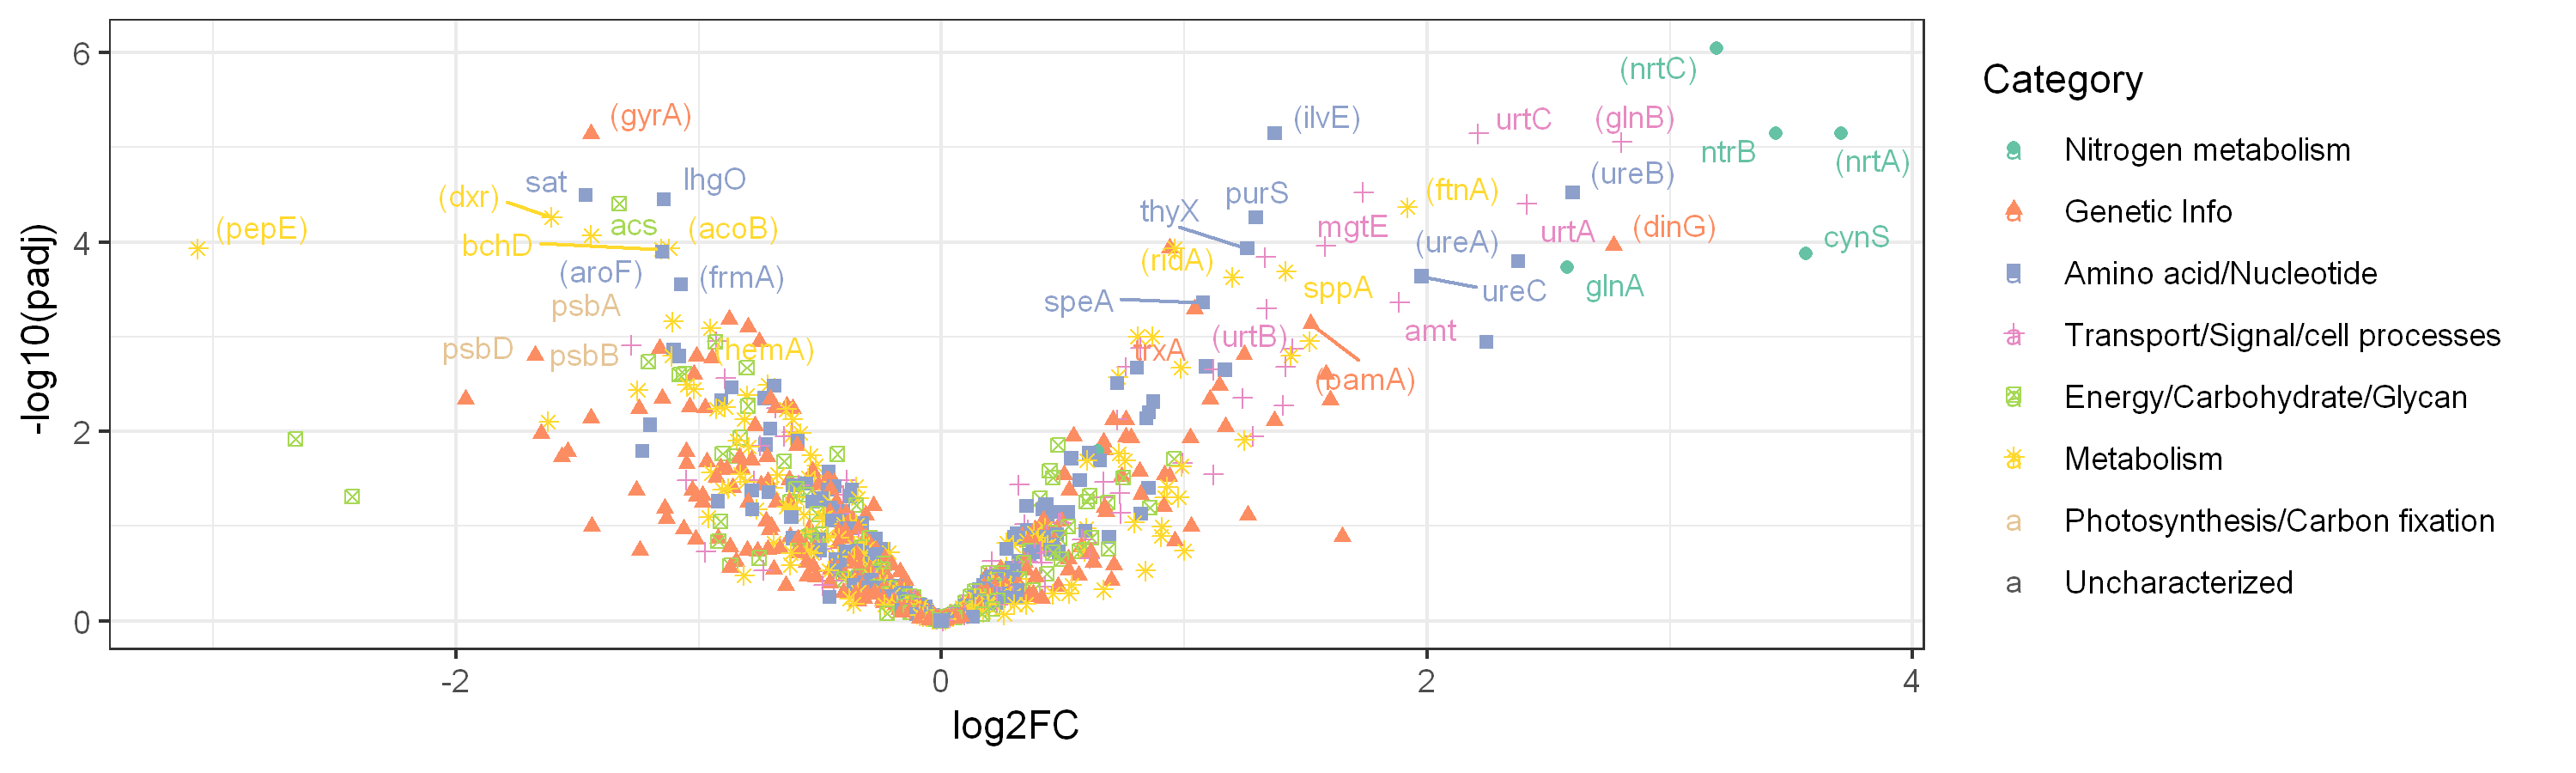

In [141]:
library(ggrepel)
assay = 'Proteome'
# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category, shape=Category )) + 
    geom_point(size=1.5 )+
    #theme_bw(base_size = 10) + # change theme
    theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    #geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    geom_text_repel(data=subset(df_all, (Assay==assay)&abs(logFC)>1&log.padj > 3),
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=3)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 122 rows containing missing values (`geom_text_repel()`)."


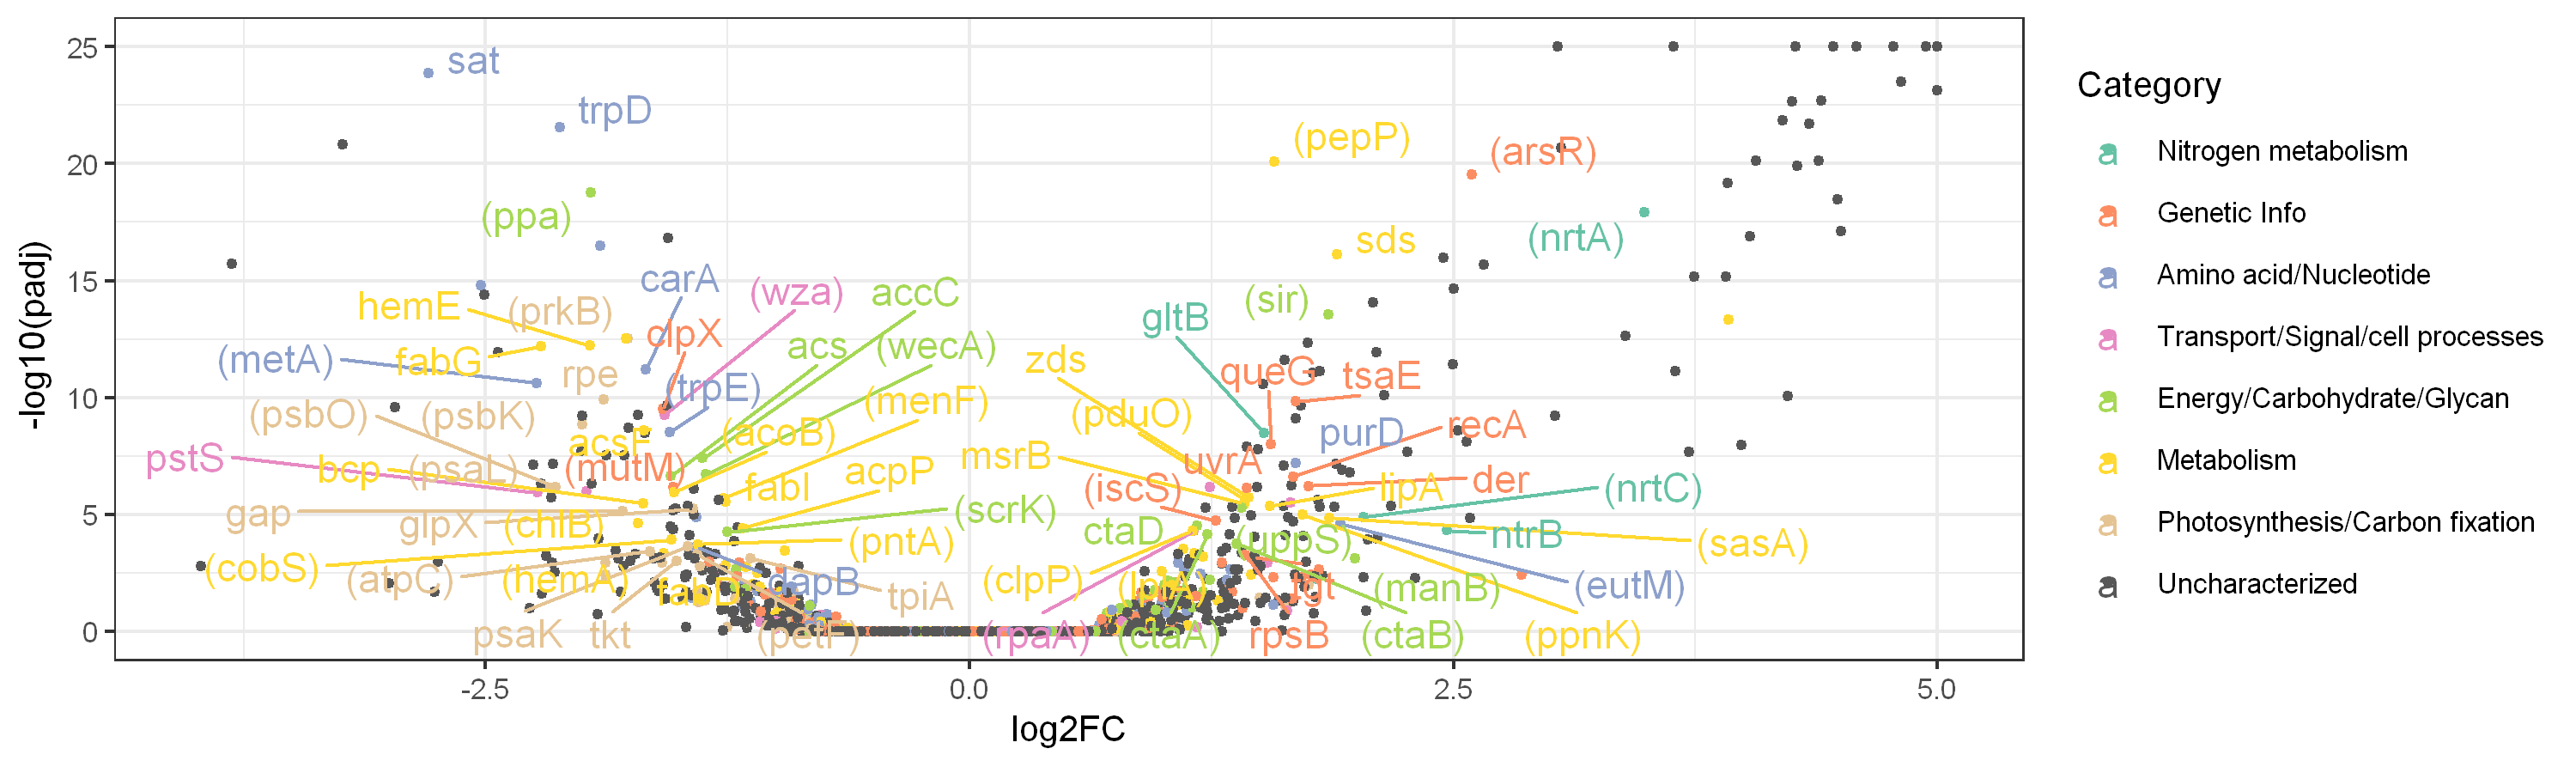

In [142]:
library(ggrepel)
assay = 'RNA'
# Use ggplot2 allows more flexibility in plotting
ymax <- 25
df_all$capped.log.padj <- pmin(df_all$log.padj, ymax)
xmax <- 5
df_all$capped.logFC <- pmin(df_all$logFC, xmax)

df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = capped.logFC, y =capped.log.padj, color=Category )) + 
    geom_point(size=1 )+
    theme_bw(base_size = 10) + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    #geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    geom_text_repel(data=subset(df_all, (Assay==assay)&abs(logFC)>1&log.padj > 3),
                    aes( capped.logFC, capped.log.padj ,label=gene), max.overlaps = Inf)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [143]:
df_all$kegg_gene

[1] "nrtC, nasD"                    "gyrA"                         
   [3] "E2.6.1.42, ilvE"               "nrtA, nasF, cynA"             
   [5] "urtC"                          NA                             
   [7] "nrtB, nasE, cynB"              "glnB"                         
   [9] "ABC.PE.S"                      "ureB"                         
  [11] "sat, met3"                     "lhgO"                         
  [13] NA                              "ACSS1_2, acs"                 
  [15] "urtA"                          "ftnA, ftn"                    
  [17] NA                              NA                             
  [19] NA                              "purS"                         
  [21] "dxr"                           NA                             
  [23] "K14330"                        NA                             
  [25] "dinG"                          "mgtE"                         
  [27] NA                              "pepE"                         
  [29] "hupB"                          NA                             
  [31] "thyX, thy1"                    NA                             
  [33] "acoB"                          "pncC"                         
  [35] "chlD, bchD"                    NA                             
  [37] "E2.5.1.54, aroF, aroG, aroH"   "cynS"                         
  [39] NA                              "TC.CIC"                       
  [41] NA                              "ureA"                         
  [43] NA                              NA                             
  [45] "glnA, GLUL"                    "sppA"                         
  [47] "ureC"                          NA                             
  [49] "ridA, tdcF, RIDA"              "frmA, ADH5, adhC"             
  [51] NA                              "amt, AMT, MEP"                
  [53] "speA"                          NA                             
  [55] "urtB"                          "trxA"                         
  [57] "K09958"                        NA                             
  [59] "psbA"                          "prfA, MTRF1, MRF1"            
  [61] NA                              "hemA"                         
  [63] NA                              NA                             
  [65] "SAM50, TOB55, bamA"            "K06873"                       
  [67] NA                              NA                             
  [69] NA                              "rpoS"                         
  [71] "psbD"                          NA                             
  [73] "nodU"                          "psbB"                         
  [75] "E2.2.1.1, tktA, tktB"          NA                             
  [77] "E3.4.21.102, prc, ctpA"        "pepP"                         
  [79] "rimP"                          "TC.SULP"                      
  [81] NA                              "ribH, RIB4"                   
  [83] "psbC"                          "eutM"                         
  [85] "K16149"                        "TC.SULP"                      
  [87] NA                              "ecfA1"                        
  [89] NA                              "dnaE"                         
  [91] "urtD"                          "metB"                         
  [93] NA                              NA                             
  [95] NA                              "psaA"                         
  [97] NA                              "ureG"                         
  [99] NA                              "RP-S5, MRPS5, rpsE"           
 [101] "lcyB, crtL1, crtY"             "murJ, mviN"                   
 [103] "tig"                           "AGXT"                         
 [105] "uvrB"                          NA                             
 [107] NA                              NA                             
 [109] "cysH"                          "eutN"                         
 [111] "urtE"                          "PRDX2_4, ahpC"                
 [113] NA                  

In [144]:
help(geom_text_repel)

geom_label_repel {ggrepel},R Documentation
mapping,"Set of aesthetic mappings created by aes or aes_. If specified and inherit.aes = TRUE (the default), is combined with the default mapping at the top level of the plot. You only need to supply mapping if there isn't a mapping defined for the plot."
data,"A data frame. If specified, overrides the default data frame defined at the top level of the plot."
stat,"The statistical transformation to use on the data for this layer, as a string."
position,"Position adjustment, either as a string, or the result of a call to a position adjustment function."
parse,"If TRUE, the labels will be parsed into expressions and displayed as described in ?plotmath"
...,"other arguments passed on to layer. There are three types of arguments you can use here: Aesthetics: to set an aesthetic to a fixed value, like colour = ""red"" or size = 3. Other arguments to the layer, for example you override the default stat associated with the layer. Other arguments passed on to the stat."
box.padding,"Amount of padding around bounding box, as unit or number. Defaults to 0.25. (Default unit is lines, but other units can be specified by passing unit(x, ""units""))."
label.padding,"Amount of padding around label, as unit or number. Defaults to 0.25. (Default unit is lines, but other units can be specified by passing unit(x, ""units""))."
point.padding,"Amount of padding around labeled point, as unit or number. Defaults to 0. (Default unit is lines, but other units can be specified by passing unit(x, ""units""))."
label.r,"Radius of rounded corners, as unit or number. Defaults to 0.15. (Default unit is lines, but other units can be specified by passing unit(x, ""units""))."
